In [8]:
reset -fs

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

-----

# EDA for babynames

## Load Data

In [10]:
raw_national = pd.read_csv("../data/StateNames.csv")
raw_national.shape

(5647426, 6)

In [38]:
raw_national.head()

,Id,Name,Year,Gender,State,Count
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7


In [11]:
# more than 5M rows, let's choose a sample
# raw_nat_sample = raw_national.sample(n=100000)

raw_nat_sample = raw_national.copy()
raw_nat_sample.shape

(5647426, 6)

### Pythonize Column Names

In [12]:
# take a look
raw_nat_sample.columns = map(lambda x : x.lower().replace(' ','_').replace('count','frequency'),raw_nat_sample.columns)
raw_nat_sample.head(10)

,id,name,year,gender,state,frequency
0,1,Mary,1910,F,AK,14
1,2,Annie,1910,F,AK,12
2,3,Anna,1910,F,AK,10
3,4,Margaret,1910,F,AK,8
4,5,Helen,1910,F,AK,7
5,6,Elsie,1910,F,AK,6
6,7,Lucy,1910,F,AK,6
7,8,Dorothy,1910,F,AK,5
8,9,Mary,1911,F,AK,12
9,10,Margaret,1911,F,AK,7


In [43]:
# we don't care about 'state', let's drop it
groups = raw_nat_sample.groupby(['name','year','gender'])
raw_nat_sample = groups.aggregate({'id':min,'frequency':sum}).reset_index().set_index('id')
raw_nat_sample.head()

,name,year,gender,frequency
id,,,,
3865867,Aaban,2013,M,6
3867936,Aaban,2014,M,6
691906,Aadan,2008,M,12
695024,Aadan,2009,M,6
709856,Aadan,2014,M,5


### Task 1: find out classical names

Classical name is names with longest historical data. Because if a name appears in each every year, it means it's popular.

In [90]:
name_year_count = raw_nat_sample.copy()
name_year_count['history'] = name_year_count.groupby(['name','gender'])['year'].transform('count')
name_year_count.head(10)

,name,year,gender,frequency,history
id,,,,,
3865867,Aaban,2013,M,6,2
3867936,Aaban,2014,M,6,2
691906,Aadan,2008,M,12,3
695024,Aadan,2009,M,6,3
709856,Aadan,2014,M,5,3
1728031,Aadarsh,2009,M,5,1
4038557,Aaden,2005,M,5,9
147898,Aaden,2007,M,98,9
148308,Aaden,2008,M,939,9


In [91]:
# find names with most long history data
def get_classical_name_billboard(since=1910):
    return name_year_count[name_year_count.year >= since].groupby(['name','gender']) \
    .aggregate({'frequency':sum,'history':min}) \
    .sort_values(by=['history','frequency'], ascending=False)

#t = get_classical_name_billboard()
#print(t.ix[(t.index.get_level_values('Rachel',level='name')) & (t.index.get_level_values('F',level='gender'))])
#print(t.loc['Rachel','F'])

print(get_classical_name_billboard().head())
def find_classical_rank(name,gender,since=1910):
    '''
    name, e.g.'John'
    gender, e.g. 'M' or 'F'
    
    return: rank in classical name billboard
    '''
    #print(names_with_long_history_sorted.head())
    billboard = get_classical_name_billboard(since).reset_index()
    return billboard[(billboard.name==name) & (billboard.gender==gender)].index[0]+1


find_classical_rank('Rachel','F',since=1910)

                frequency  history
name    gender                    
James   M         4938965      105
John    M         4829733      105
Robert  M         4710600      105
Michael M         4295779      105
William M         3829026      105


78

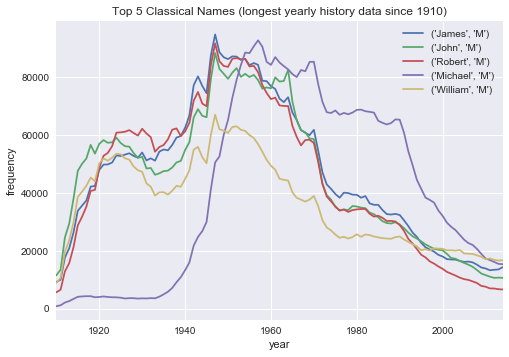

In [92]:
# print the most classical name (name with longest yearly history data)

N = 5
since=1910

classical_billboard = get_classical_name_billboard(since=since)

for i in range(N):
    # we need this evil for loop, otherwise dropna() is dropping the whole column
    year_name_crosstab[classical_billboard.index[i]].dropna().plot(kind='line');
plt.legend(classical_billboard.index[:N])
plt.title(f"Top {N} Classical Names (longest yearly history data since {since})");
plt.xlabel("year");
plt.ylabel("frequency");

### Taks 2: find out frequent names

Frequent names is purely depends on frequency of past occurance, since a particular year, regardless of "how many years of historical data".

In [94]:
def get_frequent_name_billboard(since=1910):
    '''
    since: begining of year
    
    return: list of [name, gender, avg_year_frequency]
    '''
    return name_year_count[name_year_count.year >= since].groupby(['name','gender']) \
    .aggregate({'frequency':'mean'}) \
    .sort_values(by=['frequency'], ascending=False)
    #return year_name_crosstab.loc[since:].mean(axis=0,skipna=True).sort_values(ascending=False)

get_frequent_name_billboard().head()

,,frequency
name,gender,
James,M,47037.761905
John,M,45997.457143
Robert,M,44862.857143
Michael,M,40912.180952
William,M,36466.914286


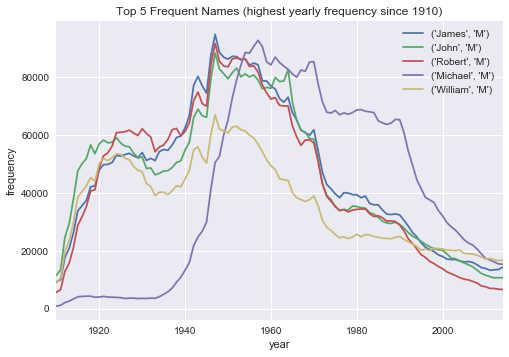

In [95]:
# print the most popular name (name with highest avg yearly frequency across history data)

N = 5
since=1910

frequent_name_billboard = get_frequent_name_billboard(since=since)

for i in range(N):
    # we need this evil for loop, otherwise dropna() is dropping the whole column
    year_name_crosstab[frequent_name_billboard.index[i]].dropna().plot(kind='line');
plt.legend(frequent_name_billboard.index[:N])
plt.title(f"Top {N} Frequent Names (highest yearly frequency since {since})");
plt.xlabel("year");
plt.ylabel("frequency");

### Task 3: find out frequency trend by given (name, gender)

Find out what is the yearly frequency trend by given (name, gender)

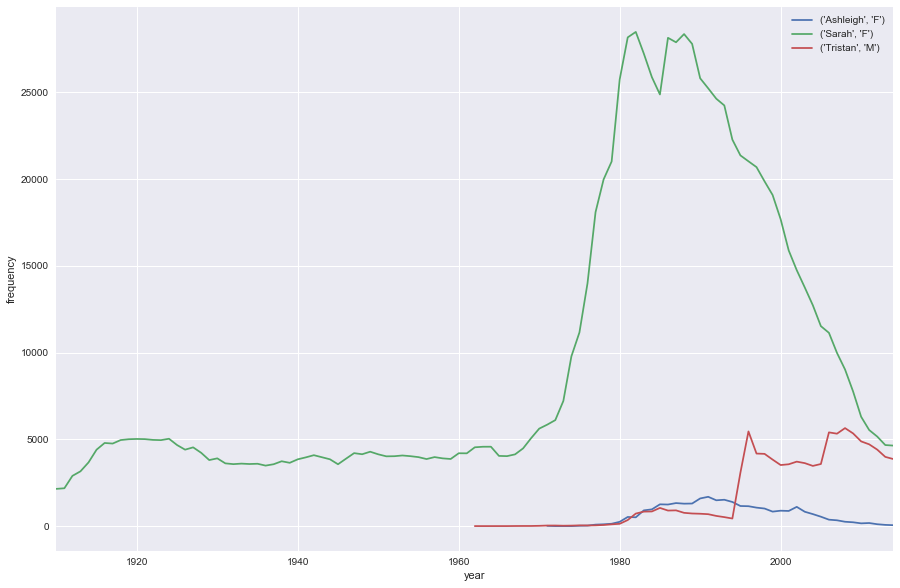

In [129]:
def print_name_frequency_trend(names,since=1910,figsize=(15,10)):
    """ Given a list of names, plot name yearly frequency trend"""
    plt.figure()
    plt.xlabel("year")
    plt.ylabel("frequency")
    for name in names:
        year_name_crosstab.loc[since:][name].dropna().plot(kind='line',figsize=figsize);
    plt.legend(names)

print_name_frequency_trend([('Ashleigh','F'),('Sarah','F'),('Tristan','M')],since=1910)

### Task 4: find popular of names

Add column popularity by following definition:

$ popularity = \frac{frequency of (gender, name ,year)}{frequency of (gender,year)} $

Popularity is the percentage of frequency that a particular name takes among the same (year,gender) pair.

In [101]:
sample = raw_nat_sample.copy()

# prepare frequency_sum per (gender,year) group
pop_total = sample.groupby(['year','gender'])['frequency'].transform(sum)

# populate derived column: popularity
sample['popularity'] = sample['frequency']/pop_total

In [105]:
print(sample.shape)
print(raw_nat_sample.shape)
sample.head()

(583913, 5)
(583913, 4)


,name,year,gender,frequency,popularity
id,,,,,
3865867,Aaban,2013,M,6,0.000004
3867936,Aaban,2014,M,6,0.000004
691906,Aadan,2008,M,12,0.000007
695024,Aadan,2009,M,6,0.000003
709856,Aadan,2014,M,5,0.000003


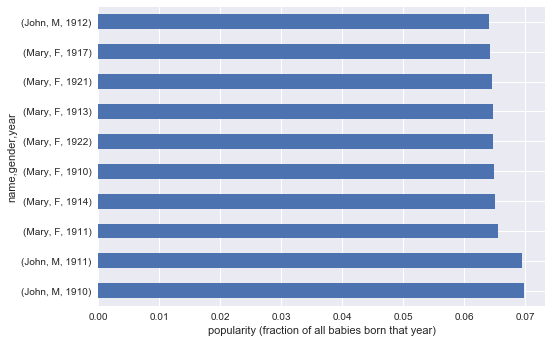

In [106]:
# show top N popular name of the year
plt.ylabel("(name,gender,year) pair")
plt.xlabel("popularity (fraction of all babies born that year)")
N = 10
sample.groupby(['name','gender','year']).popularity.sum().sort_values(ascending=False).head(N).plot(kind='barh');

### Task 5: which name has the largest sudden popularity gain v.s. 1 years before

In [113]:
# inspired by https://www.kaggle.com/dvasyukova/d/kaggle/us-baby-names/the-biggest-impacts-on-name-popularity

def popularity_diff(group):
    # build year diff series
    yd = group.year.diff().fillna(0)
    # build popularity diff series
    popd = group.popularity.diff()
    # when there's a gap in year, treat the gap as 0, which means pop diff is the same as pop itself
    popd.loc[yd>1] = group.popularity.loc[yd>1]
    # reset first row per group to 0 before certain year
    popd.iloc[0] = group.popularity.iloc[0] if group.year.iloc[0] > 2000 else 0
    
    return popd

sample['popdiff']=sample.groupby(['name','gender']).apply(popularity_diff).reset_index().set_index('id').popularity

In [114]:
def get_sudden_popular_name_billboard(since=1910):
    return sample[sample.year >=since].sort_values(by=['popdiff'],ascending=False)

In [144]:
def find_sudden_popular_rank(name,gender,since=1910):
    score = get_sudden_popular_name_billboard(since=since).reset_index()
    return score[(score.name==name) & (score.gender == gender)].index[0]+1

In [145]:
# top N sudden popular names
N = 10
since = 2000

get_sudden_popular_name_billboard(since=since)[:N]

,name,year,gender,frequency,popularity,popdiff
id,,,,,,
11151,Emma,2003,F,22701,0.014927,0.003893
11568,Ava,2005,F,13603,0.008902,0.003228
24754,Jayden,2007,M,15224,0.008293,0.003017
12625,Sophia,2010,F,20612,0.014320,0.002985
25657,Mason,2011,M,19488,0.011764,0.002921
11792,Addison,2006,F,7613,0.004865,0.002899
12413,Isabella,2009,F,22278,0.014920,0.002875
12009,Addison,2007,F,11943,0.007575,0.002710
25430,Mason,2010,M,14831,0.008843,0.002703


In [148]:
find_sudden_popular_rank('Sophia','F',since=2000)

4

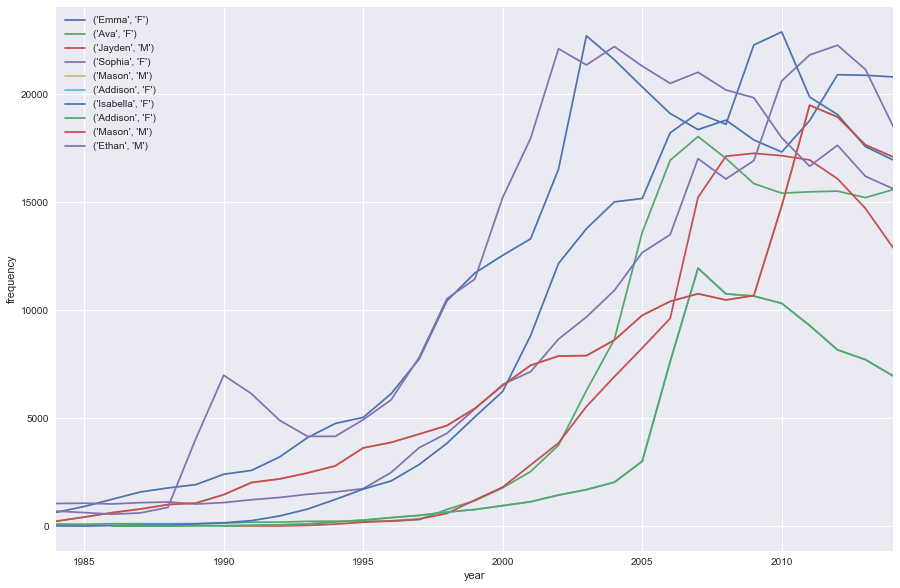

In [150]:
names = [(row[0],row[2]) for row in get_sudden_popular_name(since=since)[:N].values]
print_name_frequency_trend(names,since=1984)

### Task 6: find top N 'S' initial sudden popular names for both boy and girl, since 2000